## Image Compression through Singular Value Decomposition

Singular Value Decomposition (SVD) is a fundamental matrix factorization technique in linear algebra. It states that any matrix A can be broken down into the product of three other matrices:

$$
A = U \Sigma V^T
$$

- U: An orthogonal matrix whose columns are the left-singular vectors.
- $\Sigma$: A diagonal matrix containing the singular values of A, which are always non-negative and are typically sorted in descending order. These values represent the "importance" of different components of the original matrix.
- $V^T$: An orthogonal matrix whose columns are the right-singular vectors.

In the context of images, a grayscale image can be represented as a matrix where each entry corresponds to a pixel's intensity. SVD allows us to decompose this image matrix. The key idea behind compression is that we can reconstruct a very good approximation of the original image using only the most important (i.e., the largest) singular values, discarding the rest. This allows us to store less data while retaining most of the visual information.

In this project, our goal is to apply SVD to the provided image of Lovett Hall at Rice University. We will first convert the image to grayscale to work with a single 2D matrix, decompose it using SVD, and then reconstruct it using different numbers of singular values to demonstrate the effect of image compression.

We'll start by importing our libraries.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Then load the image


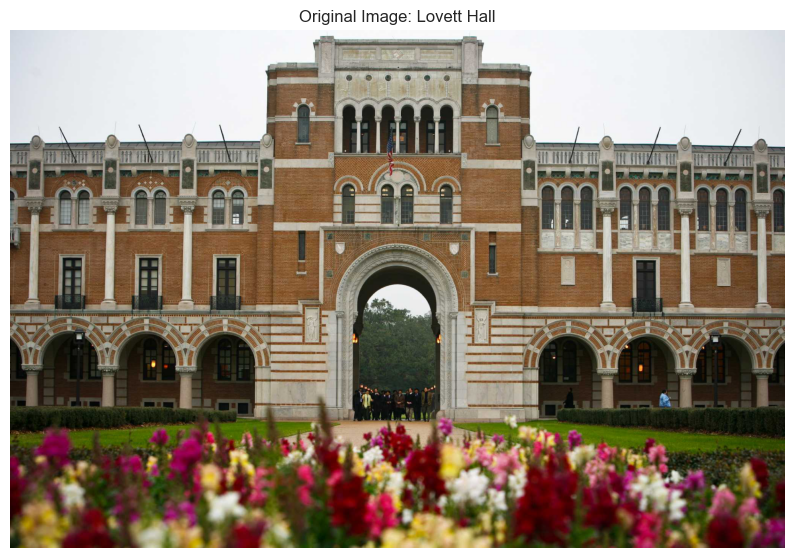

In [14]:
img = Image.open('lovetthall.png')

plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.title('Original Image: Lovett Hall')
plt.axis('off')
plt.show()

Note that SVD works on a single 2D matrix. A color image is typically composed of three channels (Red, Green, Blue), making it a 3D matrix. To simplify, we will first convert the image to grayscale, so that it is in a 2D array format, and we can apply SVD to it.

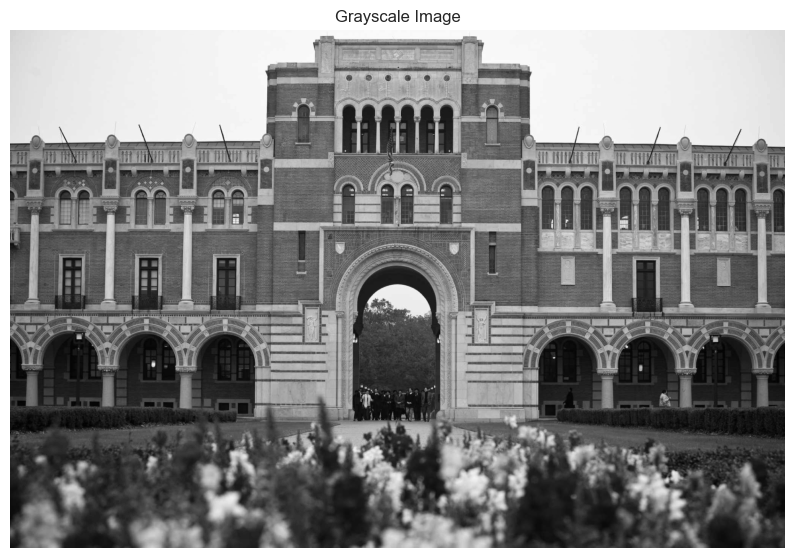

Image shape after converting to grayscale: (1368, 2048)


In [15]:
img_gray = img.convert('L')
img_matrix = np.array(img_gray)

plt.figure(figsize=(10, 7))
plt.imshow(img_matrix, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

print(f"Image shape after converting to grayscale: {img_matrix.shape}")

Now that it's converted successfully, we can execute SVD.

In [16]:
U, S, Vh = np.linalg.svd(img_matrix)

Now for image compression. We can reconstruct the image using a chosen number of singular values, 'k'. By using a smaller 'k', we effectively compress the image. Let's reconstruct the image using k = 10, 30, and 100 singular values and compare them to the original.

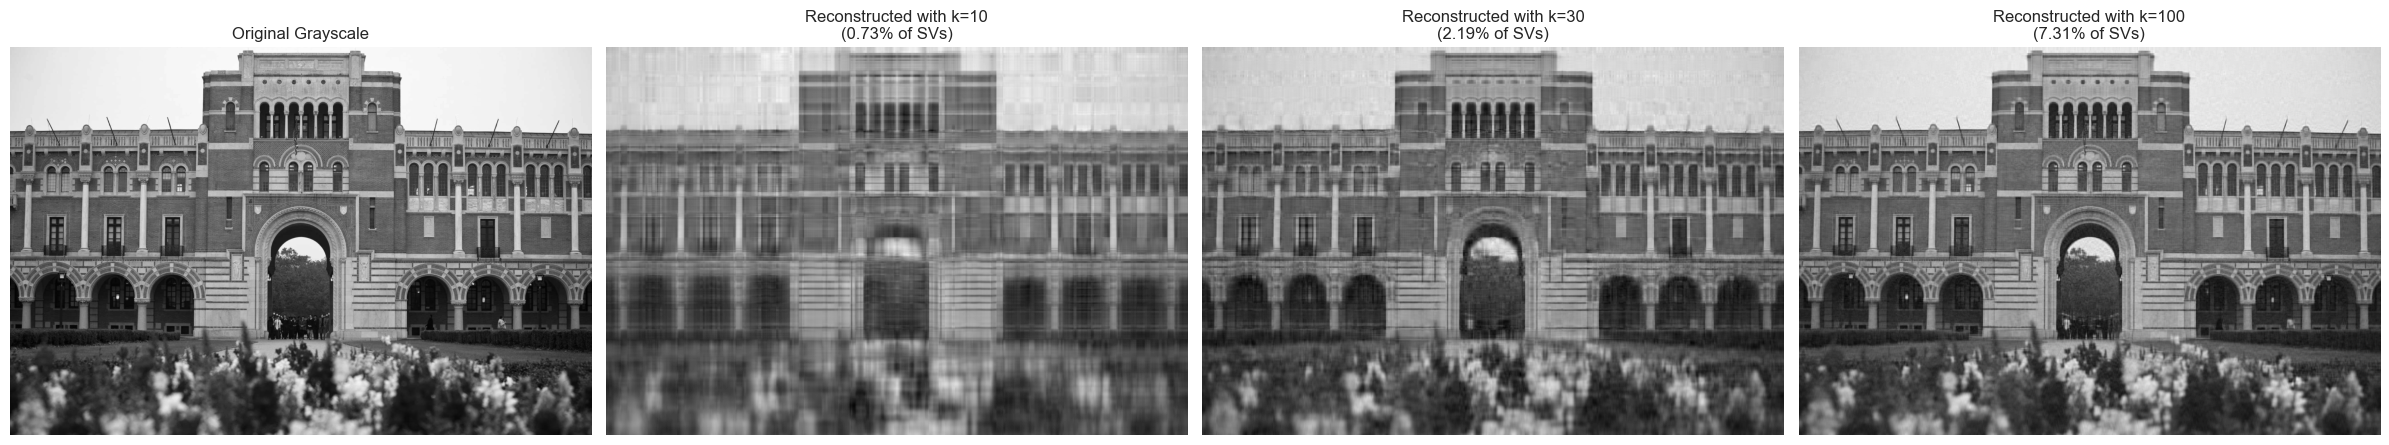

In [17]:
def reconstruct_image(U, S, Vh, k):
        Sigma = np.zeros((U.shape[1], Vh.shape[0]))
        Sigma[:len(S), :len(S)] = np.diag(S)
        
        reconstructed_matrix = U[:, :k] @ Sigma[:k, :k] @ Vh[:k, :]
        return reconstructed_matrix

k_values = [10, 30, 100]

fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(24, 6))

axes[0].imshow(img_matrix, cmap='gray')
axes[0].set_title('Original Grayscale')
axes[0].axis('off')

for i, k in enumerate(k_values):
    reconstructed_img = reconstruct_image(U, S, Vh, k)
    
    percent_sv = (k / len(S)) * 100
    
    axes[i+1].imshow(reconstructed_img, cmap='gray')
    axes[i+1].set_title(f'Reconstructed with k={k}\n({percent_sv:.2f}% of SVs)')
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()

As you can see, the lower k reconstructions result in a more compressed image, but visually it's clear that it has been compressed. As we gradually up the k value, we can see that the difference between k=100 and the original grayscale image is pretty negligible. This means we achieve a non-noticeable quality image while still only using 7.31% of the original singular values.